# Email Spam Detection using Machine Learning

In [ ]:
import nltk
nltk.download('punkt')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re

### Loading The DataSet 

In [3]:
data_read=pd.read_csv("C:\\Users\\SHAGUN\\OneDrive\\Desktop\\oasis\\spam.csv")

In [4]:
data_read

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
#displaying first 10 data of the dataset
data_read.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [6]:
#displaying last 10 data of the dataset
data_read.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


### Getting the Basic Information about the DataSet

In [7]:
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
data_read.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [9]:
data_read.size

27860

In [10]:
data_read.shape

(5572, 5)

In [11]:
data_read.isnull().sum() #checking null values

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
data_read.duplicated().sum() #checking duplicate values

403

In [13]:
data_read.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

### Cleaning the DataSet

##### Dropping the duplicate values

In [14]:
data_read.drop_duplicates(keep = 'first', inplace = True)


In [15]:
data_read.duplicated().sum()

0

In [16]:
data_read.size    #checking the size again as the duplicated data is deleted

25845

##### Dropping the columns as they are unwanted

In [17]:
data_read.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [18]:
data_read

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
data_read.shape

(5169, 2)

##### Renaming the columns for the convience

In [20]:
data_read.rename(columns = {'v1' : 'Target', 'v2':'Message'}, inplace = True)

In [21]:
data_read

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Data Visulaization

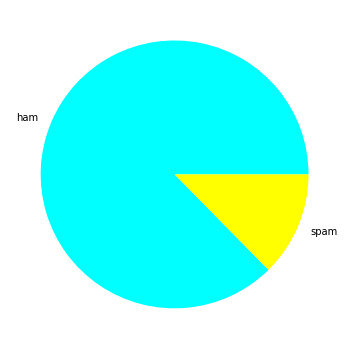

In [22]:
pt.figure(figsize=(6,8))
pt.pie(data_read['Target'].value_counts(), labels = ['ham', 'spam'],colors=['aqua','yellow'])
pt.show()

#### Number of Characters , Words and Sentences

In [23]:
data_read['characters'] = data_read['Message'].apply(len)
data_read['words'] = data_read['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
data_read['sentences'] = data_read['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
data_read.head()

,Target,Message,characters,words,sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
data_read[['characters','words','sentences']].describe()


,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.454246,1.948152
std,58.174846,13.325668,1.363792
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


<AxesSubplot:xlabel='characters', ylabel='Count'>

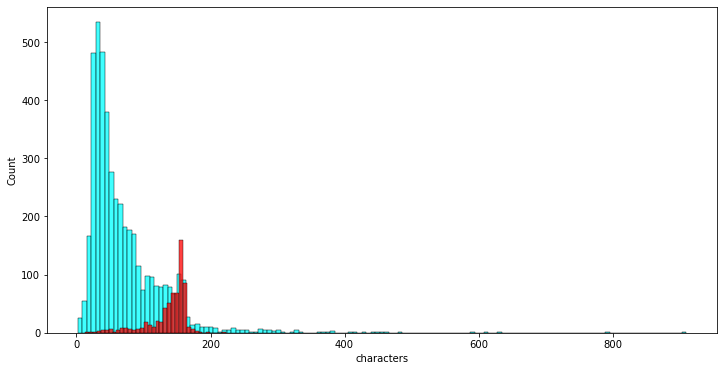

In [26]:
#histogram for characters
pt.figure(figsize=(12,6))
#ham
sb.histplot(data_read[data_read['Target'] == 'ham']['characters'],color='aqua')
#spam
sb.histplot(data_read[data_read['Target'] == 'spam']['characters'],color='red')

<AxesSubplot:xlabel='words', ylabel='Count'>

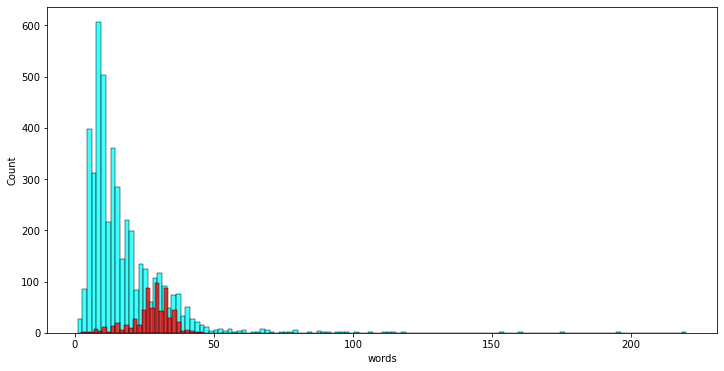

In [27]:
#histogram for words
pt.figure(figsize=(12,6))
#ham
sb.histplot(data_read[data_read['Target'] == 'ham']['words'],color='aqua')
#spam
sb.histplot(data_read[data_read['Target'] == 'spam']['words'],color='red')

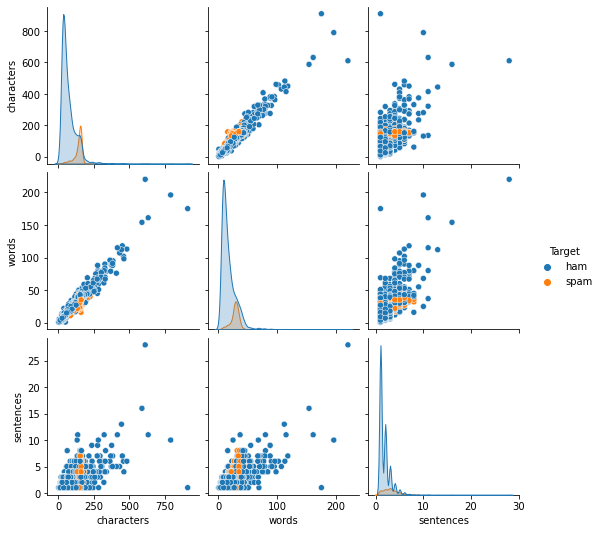

In [28]:
sb.pairplot(data_read,hue='Target')

##### Heatmap

<AxesSubplot:>

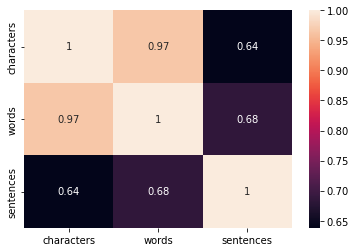

In [29]:
sb.heatmap(data_read.corr(),annot=True)

### Modelling of the data

In [30]:
mssg = data_read['Message']
tar = data_read['Target']

In [31]:
mssg

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [32]:
tar

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Target, Length: 5169, dtype: object

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(mssg,tar, test_size = 0.2, random_state = 3)

In [34]:
def changing(text):
    
    #to make lowercase
    text = text.lower()
    
    #to tokenize
    text = nltk.word_tokenize(text)
    
    #removing special charecters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    
    #Stemming
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

### Applying Logistic Regression

In [35]:
model = LogisticRegression()

In [36]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True',max_features=3000)
xtrain_features = feature_extraction.fit_transform(xtrain)
xtest_features = feature_extraction.transform(xtest)

In [37]:
model.fit(xtrain_features, ytrain)


LogisticRegression()

In [38]:
pred= model.predict(xtrain_features)
accur= accuracy_score(ytrain, pred)

### Testing

In [52]:
user_mail = input("Enter the text of the email :\n\n")

Enter the text of the email :

Congratulations, you are selected for Oasis Infobyte Internship.


In [53]:
inp=changing(user_mail)
inp
     

'congratul you are select for oasi infobyt internship'

In [54]:
inp_f= feature_extraction.transform([inp])

In [55]:
pred_op= model.predict(inp_f)

In [56]:
if (pred_op[0]==1):
    print('Spam mail')
else:
    print('Non-Spam mail')
     

Non-Spam mail


In [57]:
#accuracy
accur= accuracy_score(ytrain, pred)*100


In [58]:
accur

96.9528415961306